# A Needle in a Data Haystack - Project
## Matan Cohen, Nir Schipper & Ran Shaham
### Exploring UFO sightings data (or - ARE ALIENS REAL?)


### Initialization

In [1]:
# imports
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
from ipywidgets import interact

In [2]:
# constants
FILENAME = 'scrubbed.csv'
DATETIME = 'datetime'
YEAR = 'year'
MONTH = 'month'
DAY = 'day'
TIME = 'time'
SHAPE = 'shape'
DATE_FORMAT = '%m/%d/%Y %H:%M'
FIX_TIME_REGEX = (r'\s24:(\d{2})\s*$', r' 00:\1')

In [3]:
# magic & settings
%matplotlib inline
sns.set_context('talk')
LARGE_FIGSIZE = (12, 8)
sns.set_style(rc={'figsize': LARGE_FIGSIZE})
plt.rcParams.update({'figure.figsize': LARGE_FIGSIZE})

### Reading the data

In [4]:
# read the csv file and display some of its lines
data = pd.read_csv(FILENAME, low_memory=False)
data.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [5]:
# treat '24:xx' time values as '00:xx'
def fix_time(d):
    return re.sub(*FIX_TIME_REGEX, d)

# parse datetime
dates = [dt.datetime.strptime(fix_time(d), DATE_FORMAT) 
         for d in data[DATETIME]]

# split datetime column to multiple columns
data[DAY] = [d.day for d in dates]
data[MONTH] = [d.month for d in dates]
data[YEAR] = [d.year for d in dates]
data[TIME] = [d.time() for d in dates]

### Shapes analysis

First, we extract the unique shape values from all sightings:

In [14]:
shapes = pd.unique(data[SHAPE])
shapes = [shape for shape in shapes if not pd.isnull(shape)]

... and get the proportion of sightings with a given shape, for ever

In [7]:
# get the distribution of each shape for every year
years = np.unique(data[YEAR])
def get_shape_distribution(shape, data):
    return len(data.loc[data[SHAPE] == shape, SHAPE]) / len(data)

shapes_dist = pd.DataFrame(columns=shapes, index=years)
for year in years:
    year_data = data.loc[data[YEAR] == year, :]
    shapes_distributions = {shape: get_shape_distribution(shape, year_data)
                            for shape in shapes}
    shapes_dist.loc[year, :] = shapes_distributions

Use the following widget to explore the change in shapes in sightings over the years

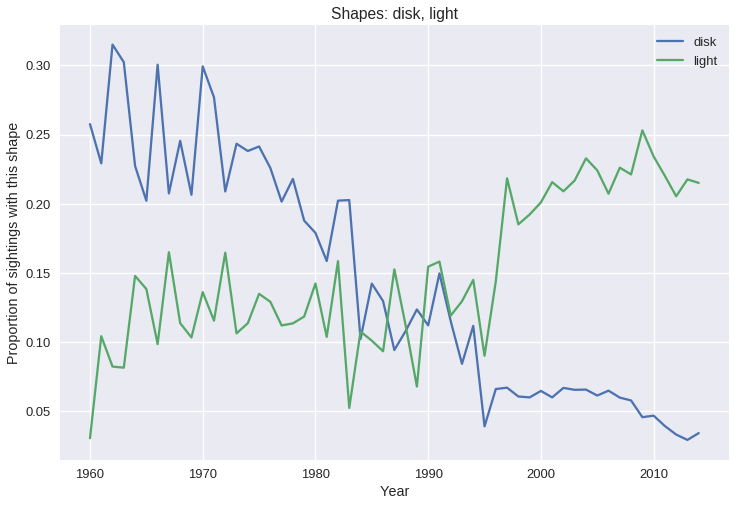

In [9]:
shapes_selection = {shape: False for shape in shapes}

@interact(from_time=[min(years), max(years)],
          to_time=[min(years), max(years)],
          shape_1=shapes.tolist(), 
          shape_2=shapes.tolist())
def plot_shape_distributions(from_time=1960,
                             to_time=2014,
                             shape_1='disk', 
                             shape_2='light'):
    # configure the figure
    plt.figure()
    plt.xlabel('Year')
    plt.ylabel('Proportion of sightings with this shape')
    plt.title('Shapes: %s, %s' % (shape_1, shape_2))
    
    # get the relevant data and plot it
    to_time = max(from_time, to_time)
    x_0 = years[(years >= from_time) & (years <= to_time)]
    ys = [None, None]
    ys[0] = shapes_dist.loc[x_0, shape_1]
    ys[1] = shapes_dist.loc[x_0, shape_2]
    for y in ys:
        y = y.replace(0, np.nan).dropna()
        x = [year for year in x_0 if year in y.index]
        plt.plot(x, y)

    plt.legend()

_We get a lot less disk-shaped UFOs these days. What a shame._

_Check out the `light` and `fireball` shapes as well!_